# Importando conjunto de dados e bibliotecas necessárias

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [90]:
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Explorando, entendento e realizando tratamento dos dados

In [91]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [92]:
df.describe(exclude='number')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
df.dropna(inplace=True) # Removendo valores ausentes

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Pré-processamento 

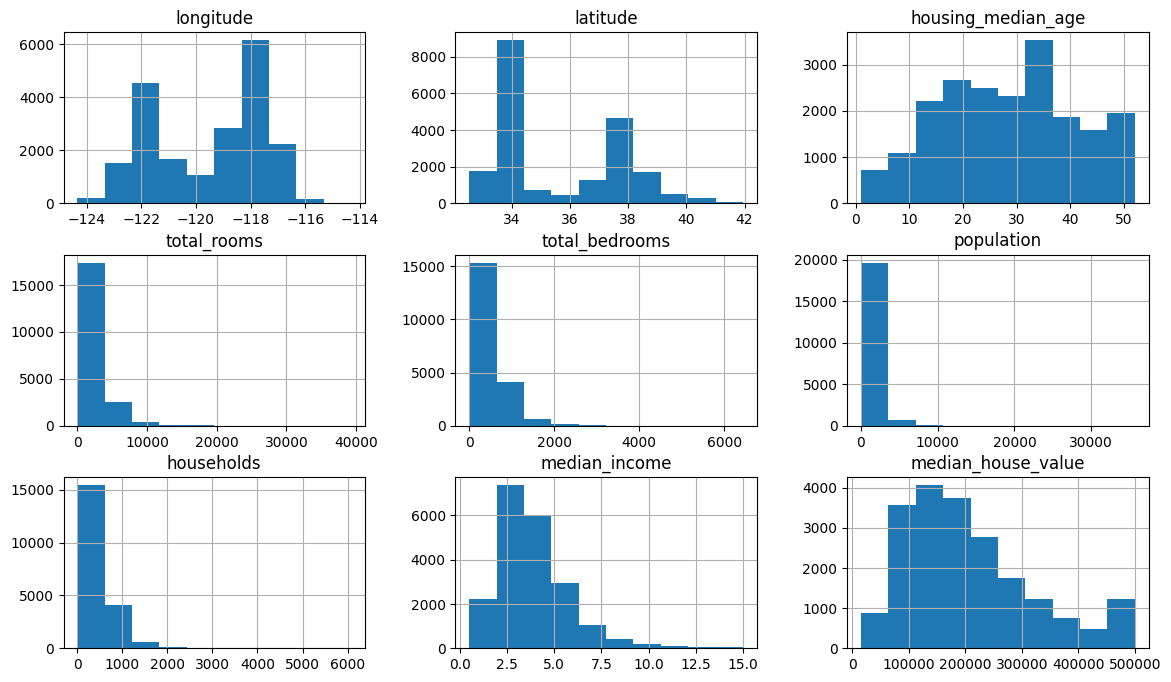

In [37]:
df.hist(figsize=(14,8));

In [107]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

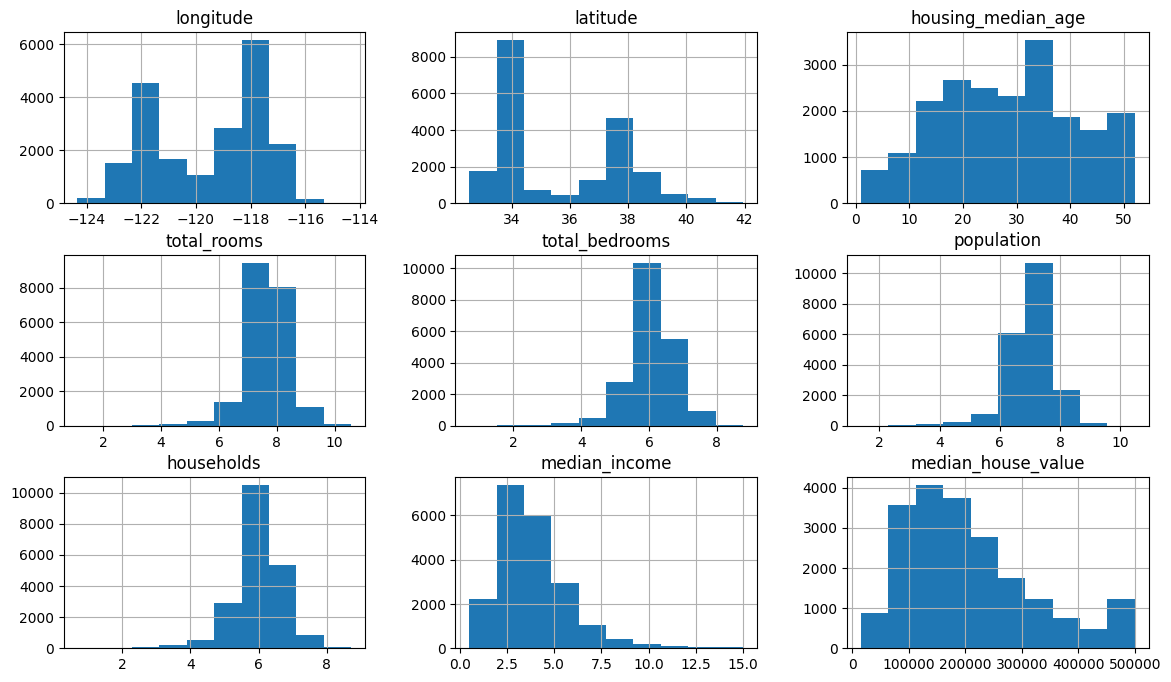

In [109]:
# Vendo os gráficos acima, vemos que é necessário realizar uma operação para aproximar a curva gaussiana
# Regressão linear que aplicaremos pressupões a normalidade
colunas = ['total_rooms','total_bedrooms','population','households']
for coluna in colunas:
    df[coluna] = np.log(df[coluna]+1)
df.hist(figsize=(14,8));

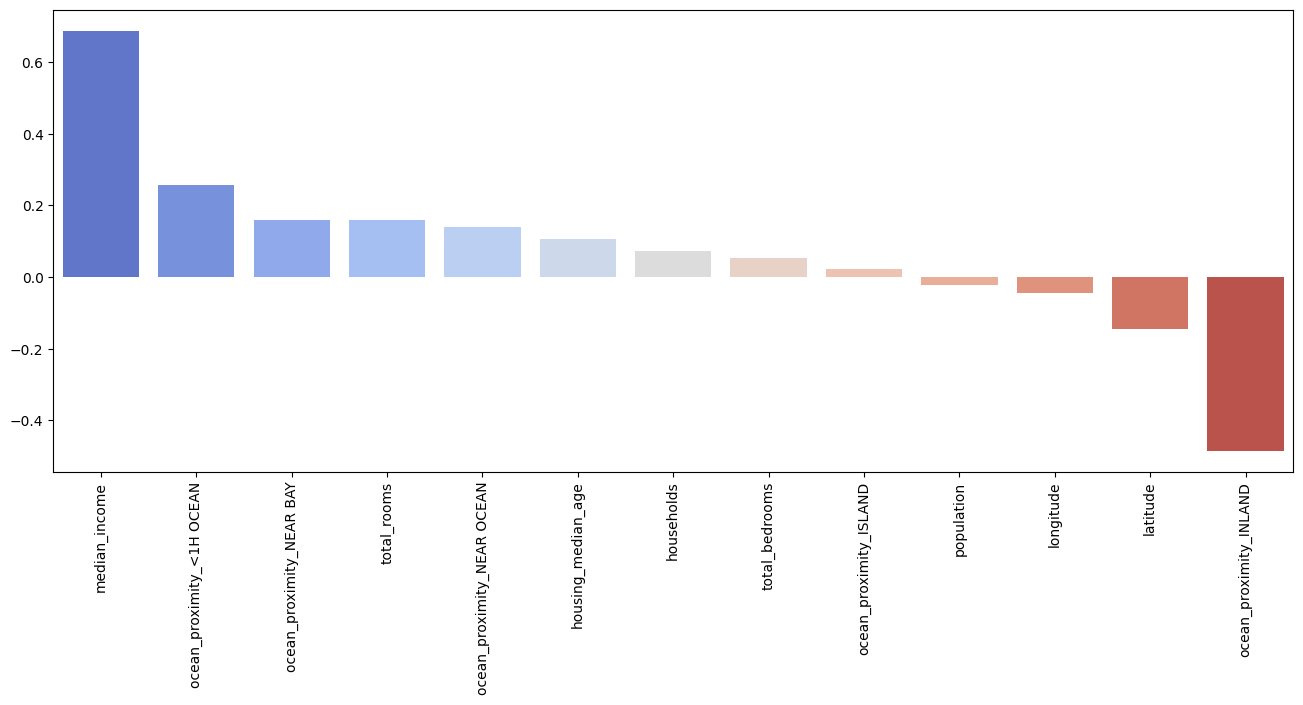

In [114]:
dummies = pd.get_dummies(df)
valores = dummies.corr()['median_house_value'].sort_values(ascending=False)[1:]

fig, ax = plt.subplots(figsize= (16, 6))
sns.barplot(x=valores.index, y=valores.values, palette='coolwarm')
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('')

plt.show()
# Aqui podemos observar que a proximidade do mar e a renda média são os fatores mais importantes na hora do preço

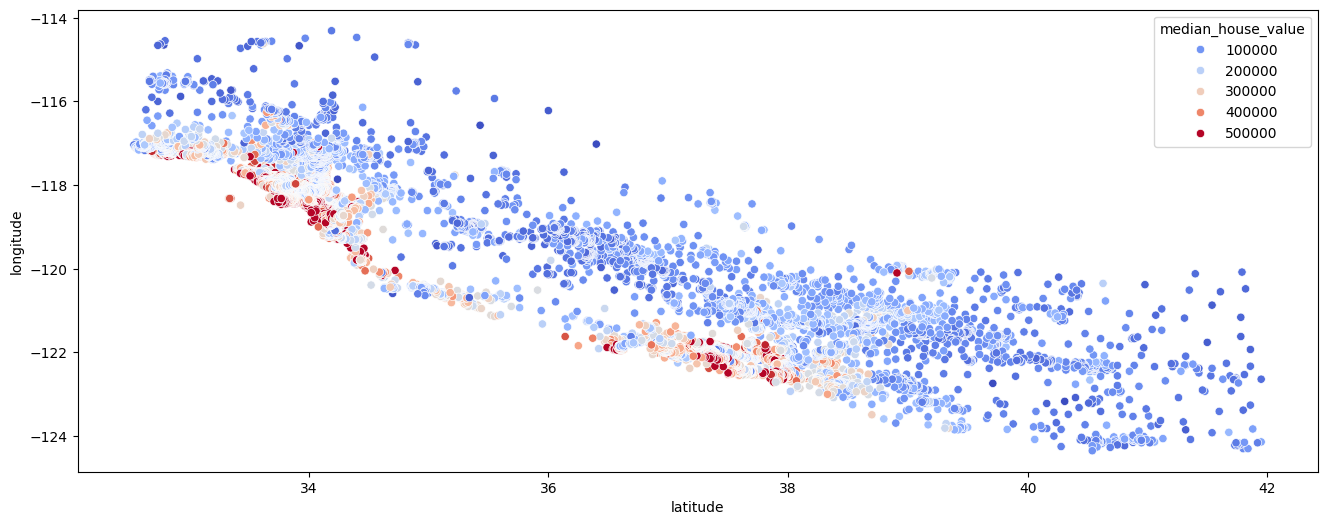

In [117]:
plt.figure(figsize= (16, 6))
sns.scatterplot(x='latitude',y='longitude',data=df, hue='median_house_value', palette='coolwarm');
# Aqui podemos observar que a costa parece estar na parte diagonal inferior esquerda do gráfico
# Onde se acumulam as casas com preços maiores

# Feature Engineering

In [118]:
# Vamos adicionar novas variáveis a partir das que já temos para melhorar nosso modelo
df['bedrooms_ratio'] = df['total_bedrooms']/df['total_rooms'] # Taxa de quartos por cômodo
df['household_rooms'] = df['total_rooms']/df['households'] # Total de quartos por morador

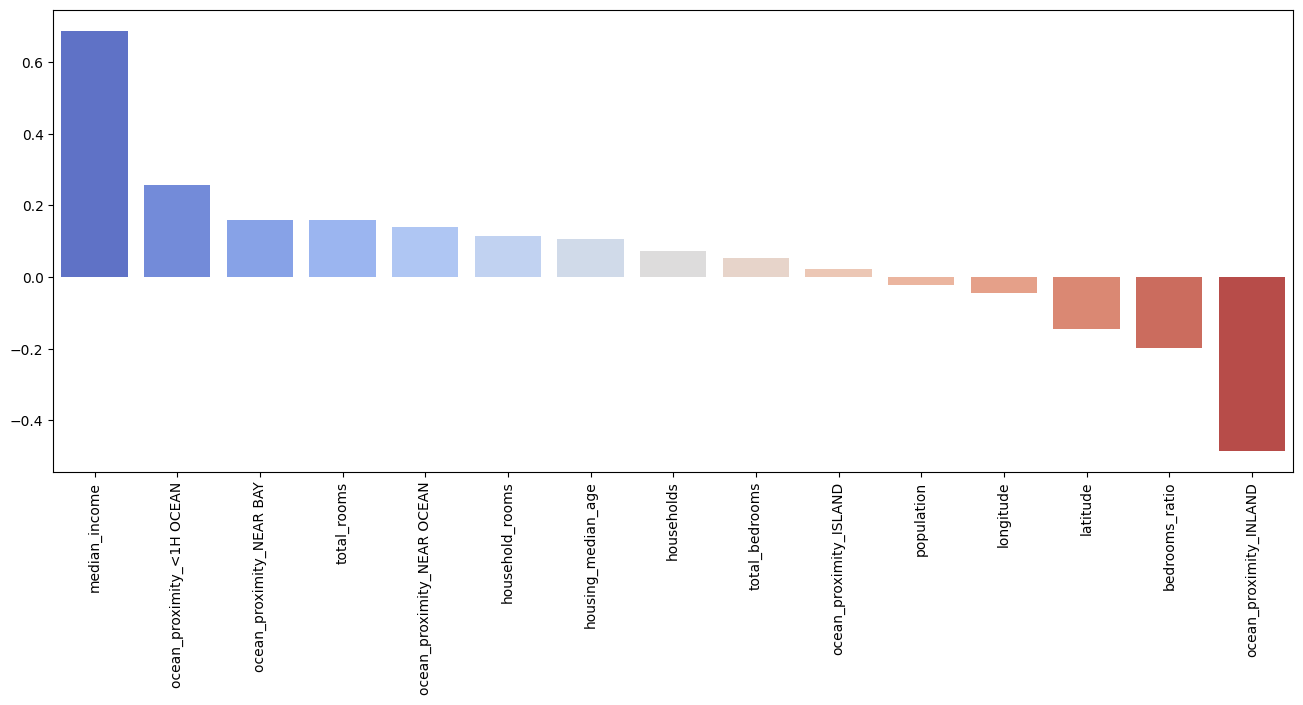

In [119]:
dummies = pd.get_dummies(df)
valores = dummies.corr()['median_house_value'].sort_values(ascending=False)[1:]

fig, ax = plt.subplots(figsize= (16, 6))
sns.barplot(x=valores.index, y=valores.values, palette='coolwarm')
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('')

plt.show()

# Separando Treino e Teste para poder validar o modelo

In [125]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df)
x = df.drop(['median_house_value'],axis=1)
y= df['median_house_value']


In [126]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Aplicando a regressão linear

In [127]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

## Realizando teste de acurácia

In [132]:
reg.score(X_test,y_test) # R²- coeficiente de determinação (o quão a curva se ajusta ao dados)

0.6746353018627427

# Aplicando random forest

In [130]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

RandomForestRegressor()

In [134]:
forest.score(X_test,y_test) # Podemos notar que este modelo melhorou o ajuste

0.8218131648269285